In [1]:
# using Google CoLab as my coding environment 
# checking the GPU 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import os
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print("The shape of x_train", x_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of x_test", x_test.shape)
print("The shape of y_test", y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
The shape of x_train (50000, 3072)
The shape of y_train (50000, 10)
The shape of x_test (10000, 3072)
The shape of y_test (10000, 10)


In [0]:
# hyperparameters
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 1024
DROPOUT = 0.1
MOMENTUM = 0.95

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, MaxPooling2D, MaxPool2D, BatchNormalization,AveragePooling2D, Dropout

# construction a model with dropout layer
def build_mlp(input_shape, output_units=10,DROPOUT=0.1):
    input_layer = keras.layers.Input(input_shape)
    model = Sequential()
    
    # layer 1
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 2
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 3
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(DROPOUT))
    
    # layer 4
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

In [0]:
# import EarlyStopping from keras and set the monitor = val_acc
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_acc", 
                          patience=5, 
                          verbose=1
                          )

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
# model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop],
          verbose = 2
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0803 08:46:56.108389 139834704181120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 08:46:56.112108 139834704181120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 08:46:56.134048 139834704181120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 08:46:56.136811 139834704181120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 08:46:56.218635 139834704181120 deprecation_wrappe

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 5s - loss: 2.2800 - acc: 0.2132 - val_loss: 2.1259 - val_acc: 0.2584
Epoch 2/100
 - 1s - loss: 1.9123 - acc: 0.3254 - val_loss: 1.8140 - val_acc: 0.3619
Epoch 3/100
 - 1s - loss: 1.8027 - acc: 0.3646 - val_loss: 1.7267 - val_acc: 0.3932
Epoch 4/100
 - 1s - loss: 1.7381 - acc: 0.3873 - val_loss: 1.6742 - val_acc: 0.4105
Epoch 5/100
 - 1s - loss: 1.6932 - acc: 0.4029 - val_loss: 1.6340 - val_acc: 0.4223
Epoch 6/100
 - 1s - loss: 1.6550 - acc: 0.4150 - val_loss: 1.6087 - val_acc: 0.4337
Epoch 7/100
 - 1s - loss: 1.6247 - acc: 0.4278 - val_loss: 1.5786 - val_acc: 0.4420
Epoch 8/100
 - 1s - loss: 1.5945 - acc: 0.4372 - val_loss: 1.5582 - val_acc: 0.4543
Epoch 9/100
 - 1s - loss: 1.5711 - acc: 0.4414 - val_loss: 1.5446 - val_acc: 0.4556
Epoch 10/100
 - 1s - loss: 1.5477 - acc: 0.4528 - val_loss: 1.5233 - val_acc: 0.4633
Epoch 11/100
 - 1s - loss: 1.5260 - acc: 0.4591 - val_loss: 1.5049 - val_acc: 0.4689
Epoch 12/100
 - 1s - los

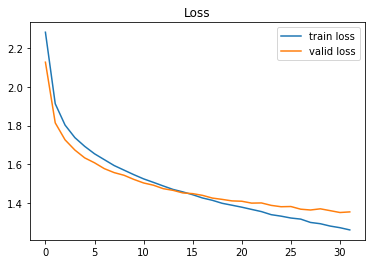

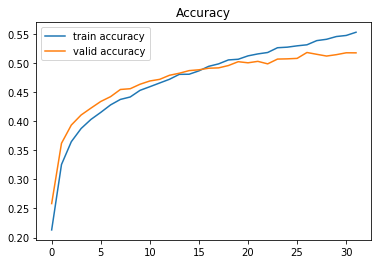

In [7]:
# plot the training result (training and validation)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [8]:
# using SGD as optimizer for training with different values of patience
 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
patience= [3,5,7,9]
results = {} # for plotting later
for pt in patience:
  
    earlystop = EarlyStopping(monitor="val_acc", 
                          patience=pt, 
                          verbose=1
                          )
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with different patience (EarlyStop) = %.6f" % (pt))
    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks = [earlystop],
              verbose=2)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-earlystop-patience%s" % str(pt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with different patience (EarlyStop) = 3.000000
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 2.3130 - acc: 0.2038 - val_loss: 2.0971 - val_acc: 0.2595
Epoch 2/100
 - 1s - loss: 1.9157 - acc: 0.3221 - val_loss: 1.8380 - val_acc: 0.3467
Epoch 3/100
 - 1s - loss: 1.7991 - acc: 0.3646 - val_loss: 1.7480 - val_acc: 0.3849
Epoch 4/100
 - 1s - loss: 1.7362 - acc: 0.3843 - val_loss: 1.6888 - val_acc: 0.4028
Epoch 5/100
 - 1s - loss: 1.6852 - acc: 0.4044 - val_loss: 1.6472 - val_acc: 0.4189
Epoch 6/100
 - 1s - loss: 1.6474 - acc: 0.4185 - val_loss: 1.6076 - val_acc: 0.4302
Epoch 7/100
 - 1s - loss: 1.6192 - acc: 0.4299 - val_loss: 1.5846 - val_acc: 0.4414
Epoch 8/100
 - 1s - loss: 1.5864 - acc: 0.4397 - val_loss: 1.5629 - val_acc: 0.4466
Epoch 9/100
 - 1s - loss: 1.5608 - acc: 0.4493 - val_loss: 1.5346 - val_acc: 0.4564
Epoch 10/100
 - 1s - loss: 1.5429 - acc: 0.4535 - val_loss: 1.5202 - val_acc: 0.4609
Epoch 11/100
 - 1s - loss: 1.5199 - acc: 0.4619 - v

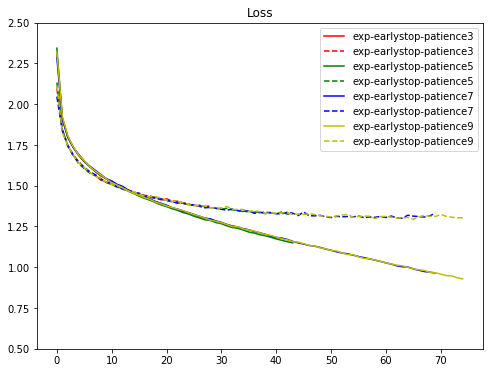

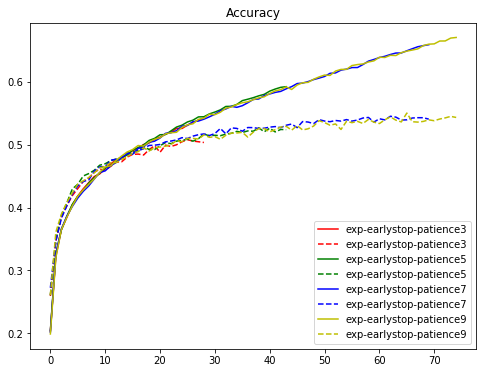

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0.5, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()